   Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                  3.0                     7.0                   4.0   
1                  3.0                     7.0                   4.0   
2                  3.0                     7.0                   4.0   
3                  5.0                     4.0                   4.0   
4                  6.0                     4.0                   4.0   

   Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
0                 26.822620               265.0                    No   
1                 31.944960               265.0                    No   
2                 28.609352               267.0                    No   
3                 31.377862               268.0                    No   
4                 24.797347               269.0                    No   

   Amount_invested_monthly  Monthly_Balance Credit_Score Credit_Mix  ...  \
0                80.415295       312.494089         

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.6573 - mae: 0.6472 - val_loss: 0.4385 - val_mae: 0.5283
Epoch 2/50
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.4373 - mae: 0.5293 - val_loss: 0.4332 - val_mae: 0.5261
Epoch 3/50
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4230 - mae: 0.5151 - val_loss: 0.4297 - val_mae: 0.5223
Epoch 4/50
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4247 - mae: 0.5171 - val_loss: 0.4286 - val_mae: 0.5167
Epoch 5/50
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4215 - mae: 0.5120 - val_loss: 0.4305 - val_mae: 0.5239
Epoch 6/50
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.4178 - mae: 0.5086 - val_loss: 0.4276 - val_mae: 0.5244
Epoch 7/50
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.4217 - mae: 0.5131 - val_loss: 0.4282 - val_mae: 0.5033
Epoch 8/50
2499/2499 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.4173 - mae: 0.5089 - val_loss: 0.4269 - val_mae: 0.5307
Epoch 9/50
2499/2499 ━━━━━━━━━━━━━━━━━━

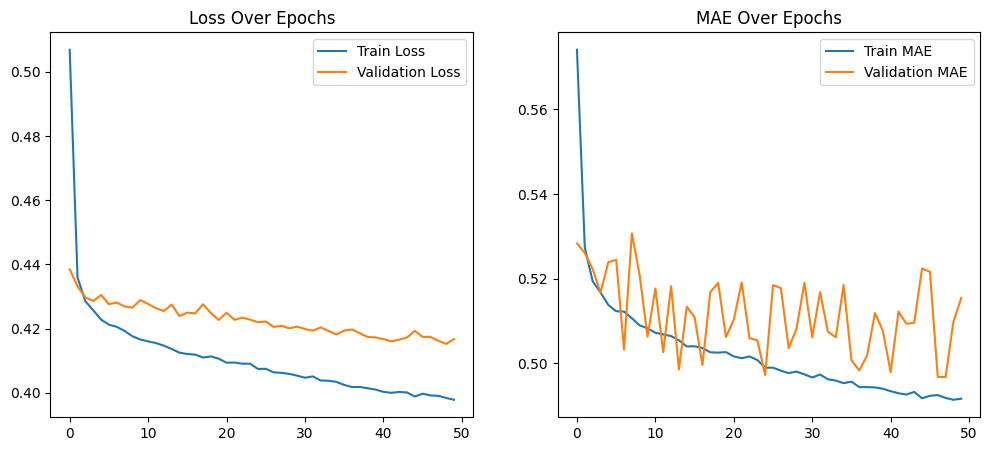

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

df = pd.read_csv("/content/drive/MyDrive/dataset/Score.csv")

# Display basic info
print(df.head())

# Handling missing values
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoders for later use

# Splitting features and target variable
X = df.drop(columns=['Credit_Score'])  # Update with the correct target column
y = df['Credit_Score']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Regression task
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.legend()

plt.show()
